In [2]:
import pandas as pd

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [4]:
f = pd.read_csv("h1b_kaggle.csv")
f.head()


,Unnamed: 0,CASE_STATUS,EMPLOYER_NAME,SOC_NAME,JOB_TITLE,FULL_TIME_POSITION,PREVAILING_WAGE,YEAR,WORKSITE,lon,lat
0,1,CERTIFIED-WITHDRAWN,UNIVERSITY OF MICHIGAN,BIOCHEMISTS AND BIOPHYSICISTS,POSTDOCTORAL RESEARCH FELLOW,N,36067.0,2016.0,"ANN ARBOR, MICHIGAN",-83.743038,42.280826
1,2,CERTIFIED-WITHDRAWN,"GOODMAN NETWORKS, INC.",CHIEF EXECUTIVES,CHIEF OPERATING OFFICER,Y,242674.0,2016.0,"PLANO, TEXAS",-96.698886,33.019843
2,3,CERTIFIED-WITHDRAWN,"PORTS AMERICA GROUP, INC.",CHIEF EXECUTIVES,CHIEF PROCESS OFFICER,Y,193066.0,2016.0,"JERSEY CITY, NEW JERSEY",-74.077642,40.728158
3,4,CERTIFIED-WITHDRAWN,"GATES CORPORATION, A WHOLLY-OWNED SUBSIDIARY O...",CHIEF EXECUTIVES,"REGIONAL PRESIDEN, AMERICAS",Y,220314.0,2016.0,"DENVER, COLORADO",-104.990251,39.739236
4,5,WITHDRAWN,PEABODY INVESTMENTS CORP.,CHIEF EXECUTIVES,PRESIDENT MONGOLIA AND INDIA,Y,157518.4,2016.0,"ST. LOUIS, MISSOURI",-90.199404,38.627003


In [32]:
del f['Unnamed: 0']
len(f)

KeyError: 'Unnamed: 0'

In [33]:
f = f.dropna()
f.reset_index()
lng = len(f)
print(lng)

MemoryError: Unable to allocate 27.4 MiB for an array with shape (10, 2877765) and data type bool

In [9]:
f.head()


,CASE_STATUS,EMPLOYER_NAME,SOC_NAME,JOB_TITLE,FULL_TIME_POSITION,PREVAILING_WAGE,YEAR,WORKSITE,lon,lat
0,CERTIFIED-WITHDRAWN,UNIVERSITY OF MICHIGAN,BIOCHEMISTS AND BIOPHYSICISTS,POSTDOCTORAL RESEARCH FELLOW,N,36067.0,2016.0,"ANN ARBOR, MICHIGAN",-83.743038,42.280826
1,CERTIFIED-WITHDRAWN,"GOODMAN NETWORKS, INC.",CHIEF EXECUTIVES,CHIEF OPERATING OFFICER,Y,242674.0,2016.0,"PLANO, TEXAS",-96.698886,33.019843
2,CERTIFIED-WITHDRAWN,"PORTS AMERICA GROUP, INC.",CHIEF EXECUTIVES,CHIEF PROCESS OFFICER,Y,193066.0,2016.0,"JERSEY CITY, NEW JERSEY",-74.077642,40.728158
3,CERTIFIED-WITHDRAWN,"GATES CORPORATION, A WHOLLY-OWNED SUBSIDIARY O...",CHIEF EXECUTIVES,"REGIONAL PRESIDEN, AMERICAS",Y,220314.0,2016.0,"DENVER, COLORADO",-104.990251,39.739236
4,WITHDRAWN,PEABODY INVESTMENTS CORP.,CHIEF EXECUTIVES,PRESIDENT MONGOLIA AND INDIA,Y,157518.4,2016.0,"ST. LOUIS, MISSOURI",-90.199404,38.627003


In [7]:
##top employers

In [12]:
f.EMPLOYER_NAME.value_counts().head(15)

INFOSYS LIMITED                                    130257
TATA CONSULTANCY SERVICES LIMITED                   64273
WIPRO LIMITED                                       45673
DELOITTE CONSULTING LLP                             35999
IBM INDIA PRIVATE LIMITED                           33585
ACCENTURE LLP                                       33226
MICROSOFT CORPORATION                               25551
HCL AMERICA, INC.                                   22488
ERNST & YOUNG U.S. LLP                              18094
COGNIZANT TECHNOLOGY SOLUTIONS U.S. CORPORATION     17322
CAPGEMINI AMERICA INC                               16628
GOOGLE INC.                                         16425
LARSEN & TOUBRO INFOTECH LIMITED                    14318
IGATE TECHNOLOGIES INC.                             12327
IBM CORPORATION                                     11976
Name: EMPLOYER_NAME, dtype: int64

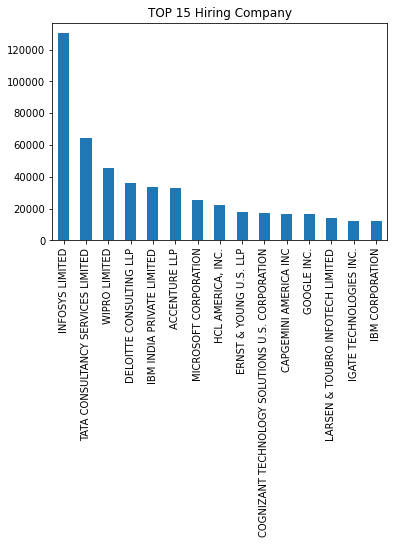

In [13]:
f['EMPLOYER_NAME'].value_counts().head(15).plot(kind = 'bar',title = "TOP 15 Hiring Company") 

In [10]:
###analyzing the wages

In [14]:
f.PREVAILING_WAGE.value_counts().sort_values(ascending = False ).head()

60000.0    10185
55245.0     6745
62566.0     6480
58053.0     5683
52499.0     5492
Name: PREVAILING_WAGE, dtype: int64

In [15]:
f.PREVAILING_WAGE.mean()

145166.64888401062

In [13]:
###Wages given by the employers

In [28]:
a = f.groupby(['EMPLOYER_NAME']).mean()['PREVAILING_WAGE'].nlargest(15).plot(kind = 'bar')

MemoryError: Unable to allocate 54.9 MiB for an array with shape (5, 2877765) and data type object

In [21]:
f['WORKSITE'].value_counts().head(20)

NEW YORK, NEW YORK            190863
HOUSTON, TEXAS                 83385
SAN FRANCISCO, CALIFORNIA      62457
ATLANTA, GEORGIA               52008
CHICAGO, ILLINOIS              51167
SAN JOSE, CALIFORNIA           49582
SUNNYVALE, CALIFORNIA          34968
DALLAS, TEXAS                  31509
BOSTON, MASSACHUSETTS          31336
REDMOND, WASHINGTON            30574
CHARLOTTE, NORTH CAROLINA      30176
IRVING, TEXAS                  29316
MOUNTAIN VIEW, CALIFORNIA      29245
SAN DIEGO, CALIFORNIA          28656
SANTA CLARA, CALIFORNIA        27945
JERSEY CITY, NEW JERSEY        26822
SEATTLE, WASHINGTON            26745
AUSTIN, TEXAS                  26695
LOS ANGELES, CALIFORNIA        26393
PHILADELPHIA, PENNSYLVANIA     24104
Name: WORKSITE, dtype: int64

In [ ]:
f['WORKSITE'].value_counts().head(20).plot(kind='bar')

In [17]:
###Calculating the no. of wages

In [18]:
f.loc[:,'WORKSITE'] = f.loc[:,'WORKSITE'].apply(lambda rec:rec.split(',')[1][1:])
def change_NA(rec):
    if (rec=='NA') :
        return 'MARIANA ISLAND'
    return rec
f.loc[:,'WORKSITE'] = f.loc[:,'WORKSITE'].apply(lambda rec: change_NA(rec))
print(len(f['WORKSITE'].unique()))

53


In [19]:
f.rename(columns ={'EMPLOYER_NAME':'EMPLOYER','FULL_TIME_POSITION':'FULL_T','PREVAILING_WAGE':'PREV_WAGE','WORKSITE':'STATES','lon':'LON','lat':'LAT'},inplace = True)

In [20]:
columns_to_keep = ['CASE_STATUS','YEAR','STATES','SOC_NAME','JOB_TITLE','FULL_T','PREV_WAGE','EMPLOYER','LON','LAT']
f =f[columns_to_keep]
f.columns

Index(['CASE_STATUS', 'YEAR', 'STATES', 'SOC_NAME', 'JOB_TITLE', 'FULL_T',
       'PREV_WAGE', 'EMPLOYER', 'LON', 'LAT'],
      dtype='object')

In [21]:
f['LON'] = f['LON'].apply(lambda lon : float("% .2f" %lon))

In [22]:
f['LAT'] = f['LAT'].apply(lambda lat : float("% .2f" %lat))

In [23]:
f.head()

,CASE_STATUS,YEAR,STATES,SOC_NAME,JOB_TITLE,FULL_T,PREV_WAGE,EMPLOYER,LON,LAT
0,CERTIFIED-WITHDRAWN,2016.0,MICHIGAN,BIOCHEMISTS AND BIOPHYSICISTS,POSTDOCTORAL RESEARCH FELLOW,N,36067.0,UNIVERSITY OF MICHIGAN,-83.74,42.28
1,CERTIFIED-WITHDRAWN,2016.0,TEXAS,CHIEF EXECUTIVES,CHIEF OPERATING OFFICER,Y,242674.0,"GOODMAN NETWORKS, INC.",-96.70,33.02
2,CERTIFIED-WITHDRAWN,2016.0,NEW JERSEY,CHIEF EXECUTIVES,CHIEF PROCESS OFFICER,Y,193066.0,"PORTS AMERICA GROUP, INC.",-74.08,40.73
3,CERTIFIED-WITHDRAWN,2016.0,COLORADO,CHIEF EXECUTIVES,"REGIONAL PRESIDEN, AMERICAS",Y,220314.0,"GATES CORPORATION, A WHOLLY-OWNED SUBSIDIARY O...",-104.99,39.74
4,WITHDRAWN,2016.0,MISSOURI,CHIEF EXECUTIVES,PRESIDENT MONGOLIA AND INDIA,Y,157518.4,PEABODY INVESTMENTS CORP.,-90.20,38.63


In [24]:
f['CASE_STATUS'].unique()

array(['CERTIFIED-WITHDRAWN', 'WITHDRAWN', 'CERTIFIED', 'DENIED',
       'REJECTED', 'INVALIDATED',
       'PENDING QUALITY AND COMPLIANCE REVIEW - UNASSIGNED'], dtype=object)

In [25]:
### calculating the petition ditribution by status

In [26]:
s_f = [0]*7
states = ['CERTIFIED-WITHDRAWN', 'WITHDRAWN', 'CERTIFIED', 'DENIED',
       'REJECTED', 'INVALIDATED',
       'PENDING QUALITY AND COMPLIANCE REVIEW - UNASSIGNED']
for i in range(0,7):
    s_f[i]= f[f.CASE_STATUS == states[i]]['CASE_STATUS'].count()
s_f

[195721, 84752, 2512114, 85161, 1, 1, 15]

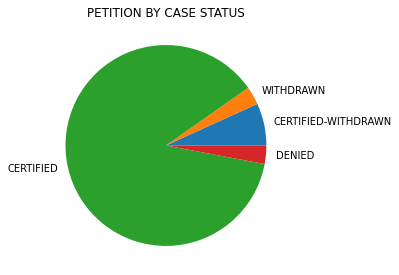

In [27]:
from matplotlib.pyplot import pie , axis , show
plt.figure(figsize=(4.5,4.5))
plt.title("PETITION BY CASE STATUS")
axis('equal')
pie(s_f[:4],labels = states[:4])
show()

In [28]:
## calculating petitions distribution per year

In [29]:
f['YEAR'].unique()

array([2016., 2015., 2014., 2013., 2012., 2011.])

In [30]:
y = [2016., 2015., 2014., 2013., 2012., 2011.]
y_c = [0]*6
for j in range(0,6):
    y_c[j] = f[f.YEAR==y[j]]['YEAR'].count()
y_c

[629299, 600120, 498027, 422427, 394267, 333625]

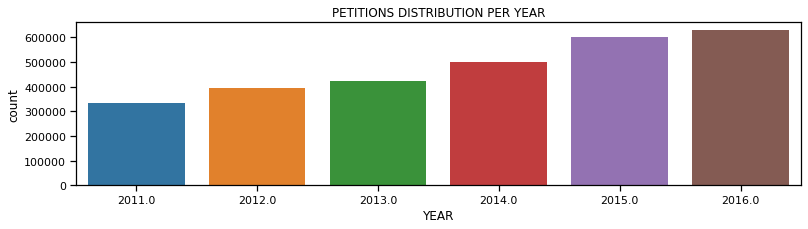

In [31]:
sns.set_context("notebook",font_scale = 1.0)
plt.figure(figsize = (13,3))
plt.title("PETITIONS DISTRIBUTION PER YEAR")
sns.countplot(f['YEAR'])

In [32]:
####ANALYZING DENIED PETITIONS PER YEAR

In [33]:
den = f[f.CASE_STATUS=='DENIED']
len(den)

85161

In [34]:
del den['CASE_STATUS']
den = den.reset_index()
den.head(2)

,index,YEAR,STATES,SOC_NAME,JOB_TITLE,FULL_T,PREV_WAGE,EMPLOYER,LON,LAT
0,39,2016.0,WASHINGTON,CHIEF EXECUTIVES,CHIEF EXECUTIVE OFFICER,Y,187200.0,"PARALLELS, INC.",-122.22,47.48
1,47,2016.0,CALIFORNIA,CHIEF EXECUTIVES,PRESIDENT,Y,197683.2,RANCHO LA PUERTA LLC,-117.16,32.72


In [35]:
##Calculating denied petition distribution per year

In [36]:
d_y = [0]*6
for i in range(0,6):
    d_y[i]=den[den.YEAR==y[i]]['YEAR'].count()
d_y

[8480, 10037, 10816, 10976, 18866, 25986]

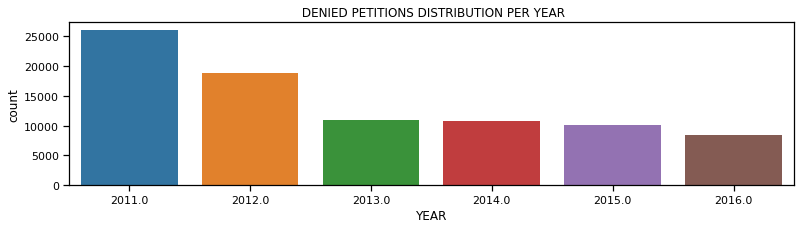

In [37]:
sns.set_context("notebook",font_scale = 1.0)
plt.figure(figsize = (13,3))
plt.title(" DENIED PETITIONS DISTRIBUTION PER YEAR")
sns.countplot(den['YEAR'])

In [38]:
###Calculating the rate at which denied petitins per year


In [39]:
d_y_r = [0]*6
for i in range(0,6):
    d_y_r[i] = float("% .2f" %((d_y[i]/y_c[i])*100))
ratio = pd.DataFrame()
ratio['YEAR'] = y
ratio['denied rate %'] = d_y_r
ratio = ratio.set_index(['YEAR'])
ratio


,denied rate %
YEAR,
2016.0,1.35
2015.0,1.67
2014.0,2.17
2013.0,2.60
2012.0,4.79
2011.0,7.79


In [40]:
ratio.T

YEAR,2016.0,2015.0,2014.0,2013.0,2012.0,2011.0
denied rate %,1.35,1.67,2.17,2.6,4.79,7.79


In [41]:
ratio = ratio.reset_index()
ratio

,YEAR,denied rate %
0,2016.0,1.35
1,2015.0,1.67
2,2014.0,2.17
3,2013.0,2.60
4,2012.0,4.79
5,2011.0,7.79


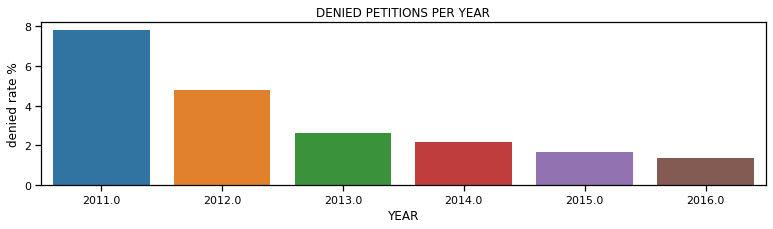

In [42]:
sns.set_context("notebook",font_scale = 1.0)
plt.figure(figsize=(13,3))
plt.title("DENIED PETITIONS PER YEAR")
g = sns.barplot(x ='YEAR',y ='denied rate %',data=ratio)

In [43]:
###Calculating the number of petitions filled by the states


In [44]:
f['STATES'].unique()

array(['MICHIGAN', 'TEXAS', 'NEW JERSEY', 'COLORADO', 'MISSOURI',
       'FLORIDA', 'CALIFORNIA', 'VIRGINIA', 'PENNSYLVANIA', 'WISCONSIN',
       'ILLINOIS', 'DISTRICT OF COLUMBIA', 'NORTH CAROLINA',
       'RHODE ISLAND', 'OHIO', 'WASHINGTON', 'GEORGIA', 'NEW YORK',
       'INDIANA', 'MARYLAND', 'MASSACHUSETTS', 'NEVADA', 'NEW HAMPSHIRE',
       'LOUISIANA', 'MINNESOTA', 'SOUTH CAROLINA', 'ARIZONA', 'TENNESSEE',
       'HAWAII', 'UTAH', 'DELAWARE', 'MARIANA ISLAND', 'KANSAS',
       'CONNECTICUT', 'MAINE', 'OKLAHOMA', 'ARKANSAS', 'PUERTO RICO',
       'ALASKA', 'IOWA', 'OREGON', 'KENTUCKY', 'NEBRASKA', 'NEW MEXICO',
       'WEST VIRGINIA', 'SOUTH DAKOTA', 'NORTH DAKOTA', 'MISSISSIPPI',
       'ALABAMA', 'VERMONT', 'IDAHO', 'WYOMING', 'MONTANA'], dtype=object)

In [45]:
US_states = ['ALABAMA','ALASKA','ARIZONA','ARKANSAS','CAALIFORNIA','COLORADO','CONNECTICUT','DELAWARE','DISTRICT OF COLUMBIA','FLORIDA','GEORGIA','HAWII','IDAHO','ILLINOIS','INDIANA','IOWA','KANSAS','KENTUCKY','LOUISTANA','MAINE','MARIANA ISLANDS','MARYLAND','MASSACHUUSSETS','MICHIGAN','MINNESOTA','MISSISSIPPI','MISSOURI','MONTANA','NEBRASKA','NEVADA','NEW HAMPSHIRE','NEW JERSEY','NEW MEXICO','NEW YORK','NORTH CAROLINA','NORTH DAKOTA','OHIO','OKALHOMA','OREGON','PENNSYLVANIA','PUERTO RICO','RHODE ISLAND','SOUTH CAROLINA','SOUTH DAKOTA','TENNESEE','TEXAS','UTAH','VERMONT','VIRGINIA','WASHINGTON','WEST VIRGINIA','WISCONSIN','WYOMING']
p_s = [0]*53
for i in  range(0,53):
    p_s[i]= f[f.STATES == US_states[i]]['STATES'].count()
pe = pd.DataFrame()
pe['STATES']= US_states
pe['FIELD PETITIONS'] = p_s
print(sum(p_s))

2164955
